#In Vehicle Coupon Recommendation Exploratory Data Analysis

* data source: http://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

__*Feature Information:*__

* destination: No Urgent Place, Home, Work
* passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
weather: Sunny, Rainy, Snowy
* temperature:55, 80, 30
* time: 2PM, 10AM, 6PM, 7AM, 10PM
* coupon: Restaurant(<$\$20$), Coffee House, Carry out & Take away, Bar, Restaurt($\$20-\$50$)

* expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
* gender: Female, Male
* age: 21, 46, 26, 31, 41, 50plus, 36, below21
* maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
* has_Children:1, 0
* education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
* occupation: Unemployed, Architecture & Engineering, Student,
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
* income:$ \$37500 - \$49999, \$62500 - \$74999, \$12500 - \$24999, \$75000 - \$87499,
\$50000 - \$62499, \$25000 - \$37499, \$100000 or More, \$87500 - \$99999, Less than \$12500$
* Bar: never, less1, 1-3, gt8, nan4-8 (feature meaning: how many times do you go to a bar every month?)
* CoffeeHouse: never, less1, 4-8, 1-3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
* CarryAway:n4-8, 1-3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
* RestaurantLessThan20: 4-8, 1-3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)

* Restaurant20To50: 1-3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20-$50 every month?)
* toCoupon_GEQ15min: 0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
* toCoupon_GEQ25min: 0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
* direction_same: 0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* direction_opp: 1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* Y: 1, 0 (whether the coupon is accepted)



## Import the useful library and lading the cleaned data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Springboard/CapstoneProject2/data/coupon_data.csv')

In [3]:
data.head()

,Unnamed: 0,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1,1
1,23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1,0
2,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1,1
3,25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0
4,26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1,0


* Looks like all features are category. 

In [4]:
# reomve the first columns(Unnamed: 0), the id of the original data
data = data.iloc[:,1:]
data.shape

(12007, 24)

##Exploratory Data Analysis

In [5]:
data.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000
mean,63.301408,0.408845,0.559507,0.116266,0.215957,0.784043,0.568418
std,19.131641,0.491641,0.496467,0.320556,0.411502,0.411502,0.495317
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



* Only 11% of people will accept the coupon if the location is 25 minutes to drive.

### Let's see the Distribution of each categorical feature.

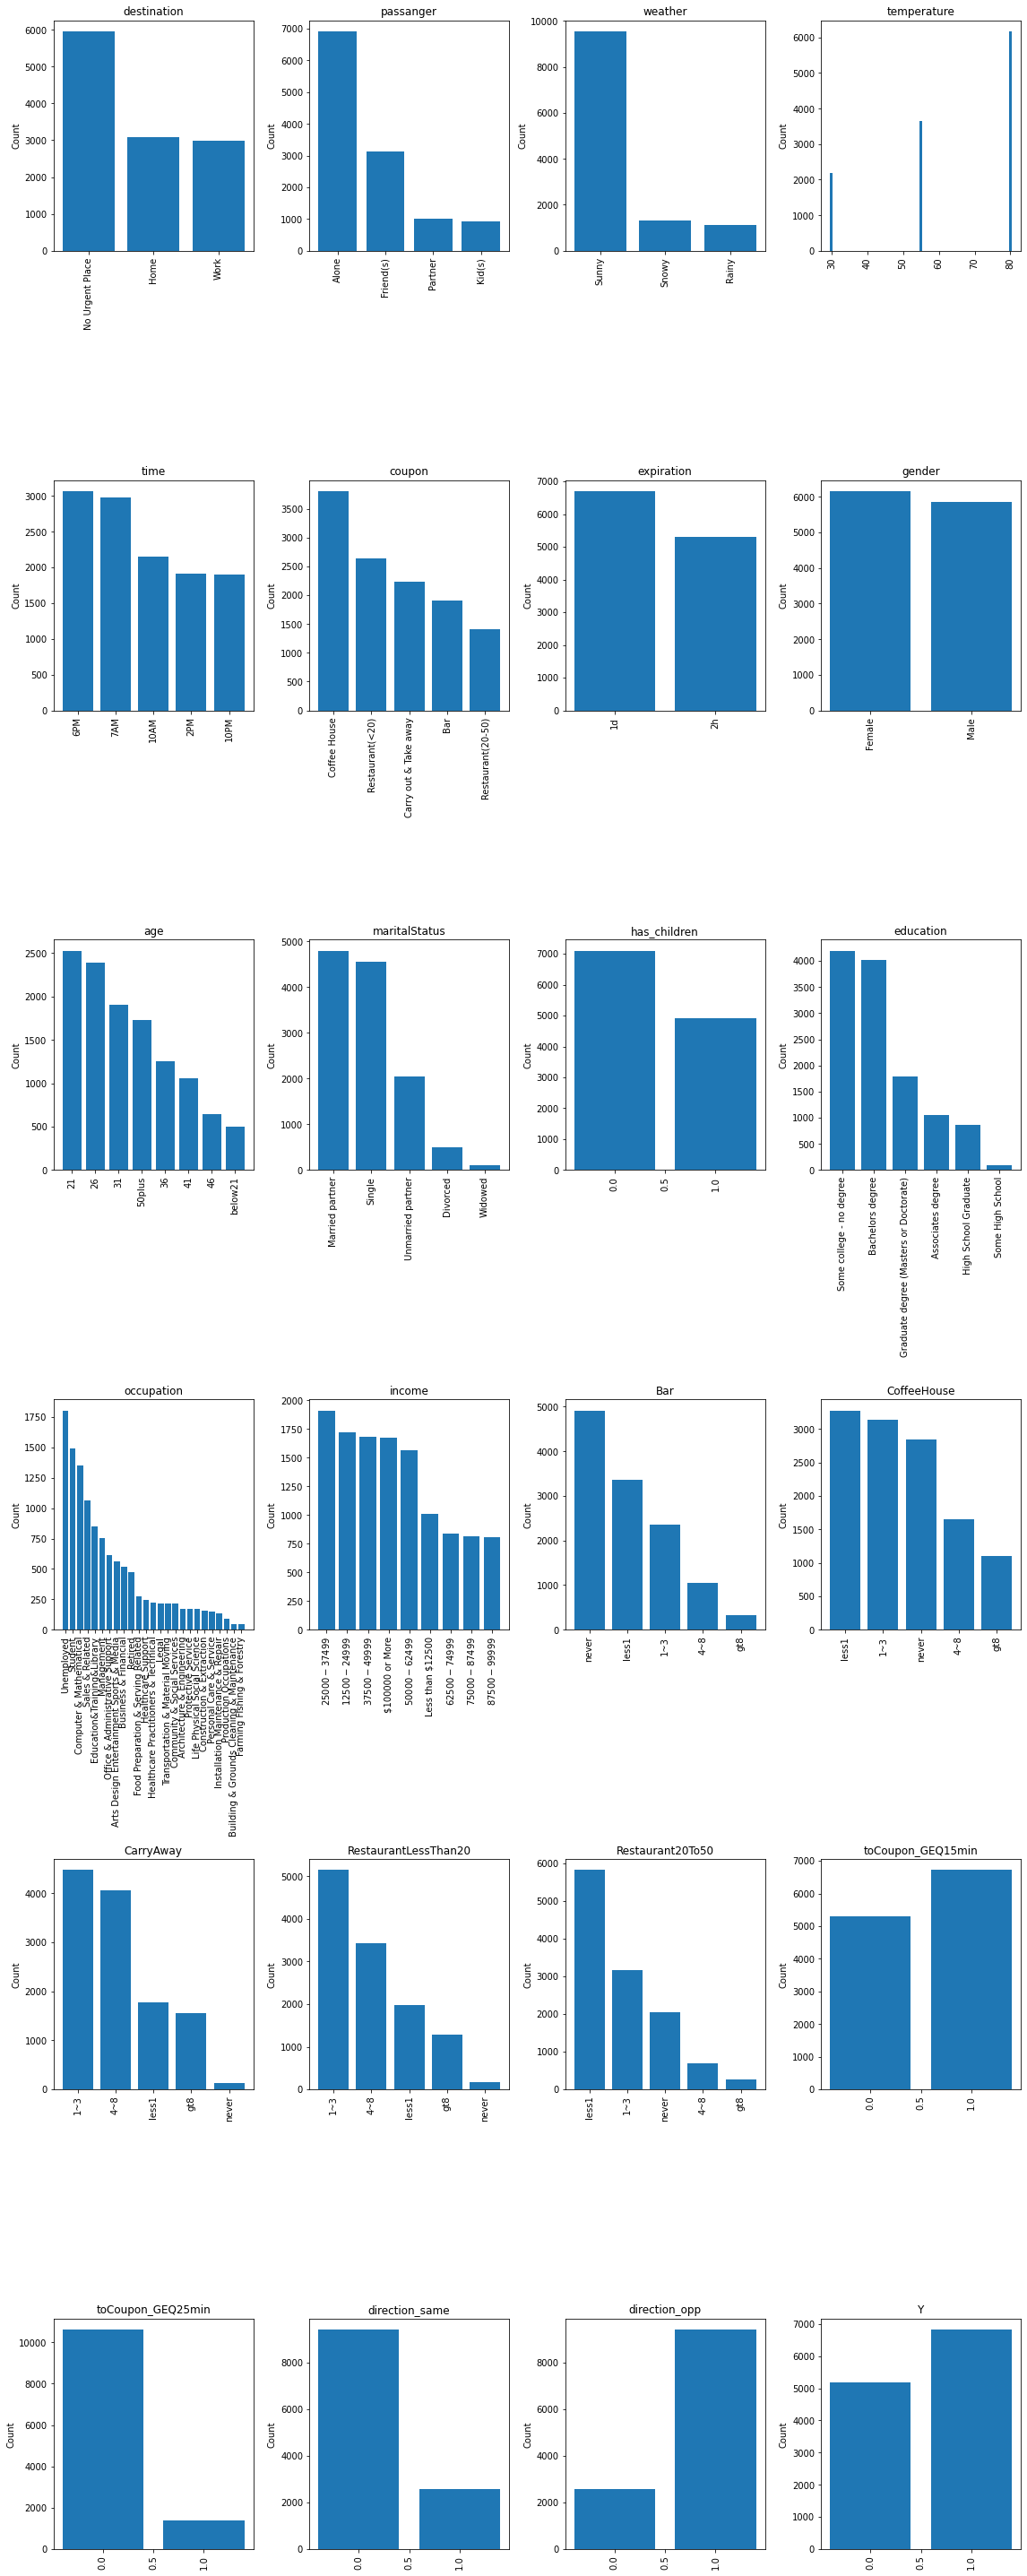

In [6]:
rows = 6
cols = 4

plt.figure(figsize=(16, 40)) 
for i in range(1,data.shape[1]+1):
  ax = plt.subplot(rows, cols, i)
  feature = data.iloc[:,[i-1]].value_counts()
  name = [j[0] for j in list(feature.index)]
  ax.bar(name, feature.values)
  plt.xticks(rotation='vertical')
  plt.title(data.columns[i-1])
  plt.ylabel('Count')

plt.tight_layout(pad=1.0)
plt.show()

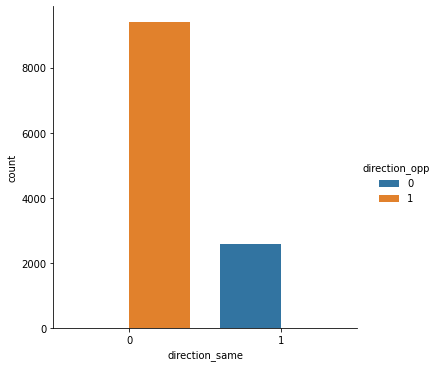

In [7]:
sns.catplot(x="direction_same", hue="direction_opp", kind="count", data=data)

*According to the histogram from above:*
* The columns direction_same and direction_opp are the same feature, one of them shoule be drop

* The label Y is not extreme unbalance，we can use the accuracy as the metric of the prediction in the future.

In [8]:
data = data.loc[:,data.columns!='direction_opp']

In [9]:
data.shape

(12007, 23)

In [10]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'Y'],
      dtype='object')

### Y vs. Features

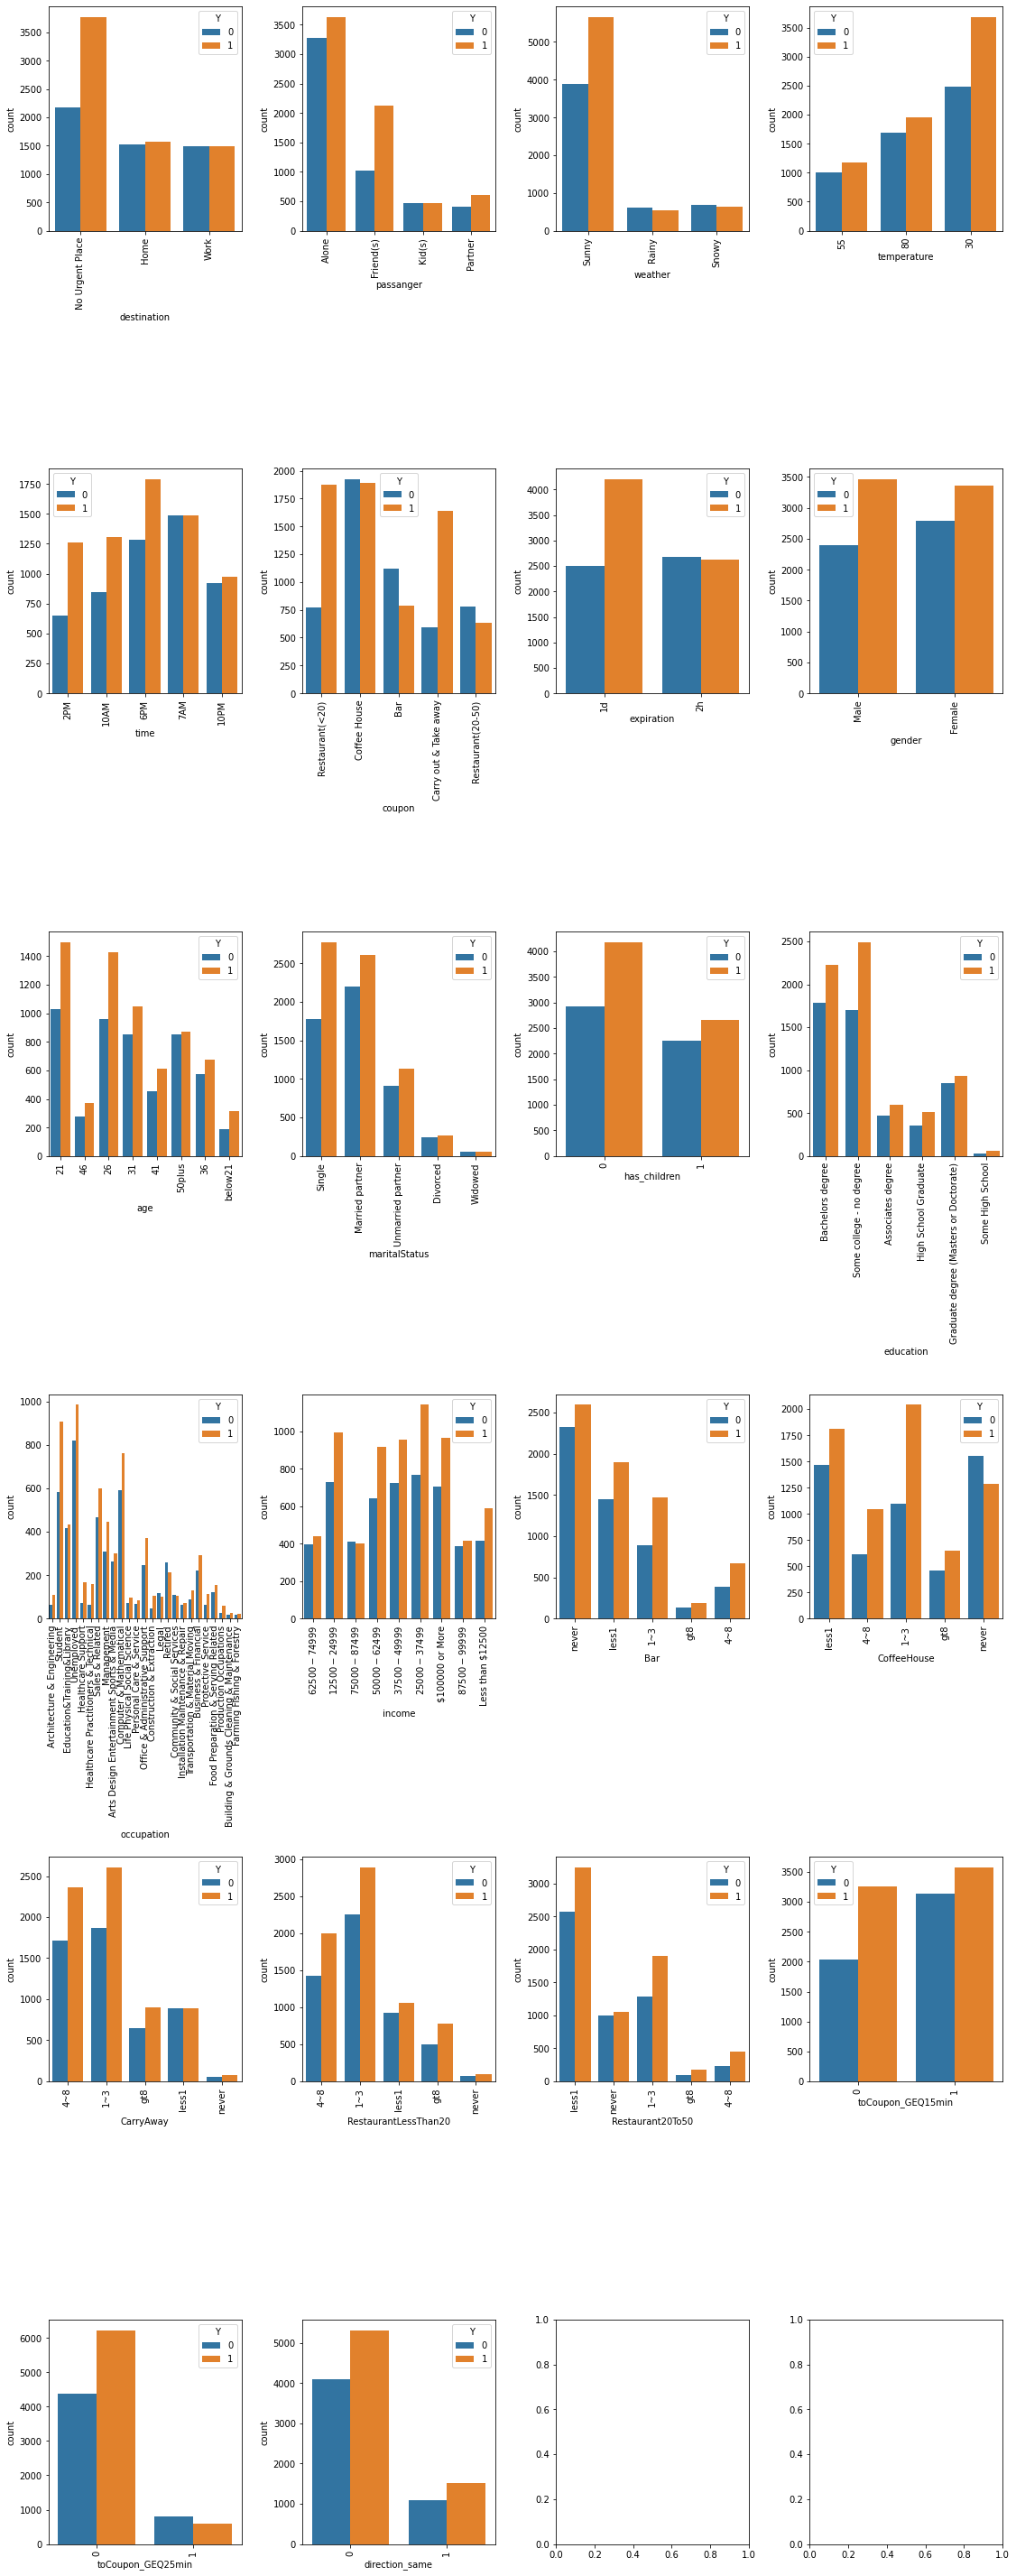

In [11]:
fig, axes = plt.subplots(6, 4, figsize=(16, 40))
cols = data.columns[:22]

for ax, col in zip(axes.flatten(), cols):
  g = sns.countplot(ax=ax, data=data, x=col, hue='Y')
  g.set_xticklabels(rotation=90, labels=data[col].unique())

plt.tight_layout(pad=2.0)
plt.show()

* People more likely accapt the coupons when they are going to some not urgent place, going with their friend, in sunny day, in lower temperture, in the afternoon, the coupon is less than $20 or coupon is for take way, the coupon expire in a day, the location is near.

* People are younger(< 30 years old), single, and don't have children are more likely to accapt the coupons.

In [13]:
#Save the data
data.to_csv('/content/drive/MyDrive/Springboard/CapstoneProject2/data/coupon_data1.csv')

In [ ]:
data.shape